<a href="https://colab.research.google.com/github/Isabellitankian/FIAP---2023/blob/main/Checkpoint1_partll_autoMLandDeploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import requests
from pprint import pprint
from bs4 import BeautifulSoup
import re
import json
from urllib.request import Request, urlopen
from lxml import html
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Web Scraping / Crawler

In [ ]:
userAgents=[
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/74.0.3729.157 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Safari/605.1.15"]

url = 'https://www.imdb.com/chart/top/?ref_=nv_mv_250'
response = requests.get(url, headers={"User-agent": userAgents[1]})
response

<Response [200]>

In [ ]:
userAgents=[
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/74.0.3729.157 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Safari/605.1.15"]

url = 'https://www.imdb.com/chart/moviemeter/?ref_=chttvtp_ql_2'
response = requests.get(url, headers={"User-agent": userAgents[1]})
response


<Response [200]>

In [ ]:
html = response.text
html

In [ ]:
#BeautifulSoup
bs = BeautifulSoup(html)
pprint(bs)


## Title EN

In [ ]:
titles = bs.find_all('h3', attrs={'class': 'ipc-title__text'})
titles

In [ ]:
list_title_en = []
for x in titles[1:-12]:
  tit = (x.text).split(">")[0].strip()
  list_title_en.append(tit)

display(len(list_title_en))
list_title_en[:5]

## Year

In [ ]:
list_years = []
years = bs.find_all('div', attrs={'class':'sc-14dd939d-5 cPiUKY cli-title-metadata'})
for y in years:
  year = y.find('span', attrs={'class':'sc-14dd939d-6 kHVqMR cli-title-metadata-item'}).text
  list_years.append(year)
display(len(list_years))
list_years[:5]

## Rating

In [ ]:
ratings = bs.find_all('div', attrs={'class':'sc-951b09b2-0 hDQwjv sc-14dd939d-2 fKPTOp cli-ratings-container'})
list_rating = []
for r in ratings:
  rating = r.find('span').text
  list_rating.append(rating)

display(len(list_rating))
pprint(list_rating[:5])

## Links sinopse

In [ ]:
list_links = []
for a in bs.find_all('a', href=True):
  if '/title/' in a['href'] and 'https://www.imdb.com/'+ a['href'] not in list_links:
    list_links.append(('https://www.imdb.com/'+a['href'])[:-15])

#Remove duplicates
list_links = list(dict.fromkeys(list_links))
#Deleting first element
list_links = list_links[1:]

display(len(list_links))
list_links[:5]

In [ ]:
headers = {
          'authority': 'www.amazon.com.br',
          'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
          'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
          'cache-control': 'max-age=0',
          'device-memory': '8',
          'downlink': '10',
          'dpr': '1.875',
          'ect': '4g',
          'rtt': '50',
          'sec-ch-device-memory': '8',
          'sec-ch-dpr': '1.875',
          'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
          'sec-ch-ua-mobile': '?0',
          'sec-ch-ua-platform': '"Windows"',
          'sec-ch-ua-platform-version': '"10.0.0"',
          'sec-ch-viewport-width': '455',
          'sec-fetch-dest': 'document',
          'sec-fetch-mode': 'navigate',
          'sec-fetch-site': 'none',
          'sec-fetch-user': '?1',
          'upgrade-insecure-requests': '1',
          'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36',
          'viewport-width': '455',
          }
############################################################
list_genre = []
list_title_pt = []
list_year = []
list_sinopse = []

for link in list_links:
  time.sleep(.5)
  response = requests.get(link, headers = headers)
  html = response.content
  soup = BeautifulSoup(html, "html.parser")

  #genre
  try:
    for genre in soup.find('span', {'class':'ipc-chip__text'}):
      genre = genre.text
      list_genre.append(genre)
  except:
      list_genre.append(np.nan)
      print('Nan')

  #title_PT and year
  try:
    for x in soup.find('title'):
      #title_pt
      title_pt = (x.text)[:-14].strip()
      list_title_pt.append(title_pt)
      #year
      year = (x.text)[-12:-8].strip()
      list_year.append(year)

  except:
    list_title_pt.append(np.nan)
    list_year.append(np.nan)

  #sinopse
  try:
    for sin in soup.find('span', {"data-testid":"plot-xl"}):
      sinopse = sin.text
      list_sinopse.append(sinopse)
  except:
    list_sinopse.append(np.nan)

  print(genre, title_pt, year, sinopse[:20])

display(len(list_genre), len(list_title_pt), len(list_year), len(list_sinopse))
print(list_genre[:5])
print(list_title_pt[:5])
print(list_year[:5])
display(list_sinopse[:2])

## DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive0', force_remount=True)

Mounted at /content/drive0


In [ ]:
a = {'title_pt' : list_title_pt ,'year' : list_year , 'genre': list_genre , 'sinopse':list_sinopse}
df = pd.DataFrame.from_dict(a, orient='index')
df = df.transpose()

In [ ]:
# #completar
# df = pd.DataFrame({'title_pt':list_title_pt,
#                   'year':list_year,
#                    'genre':list_genre,
#                    'sinopse':list_sinopse})
# display(df.head())

In [ ]:
df.count()

# Export df to csv

In [ ]:
from datetime import datetime
today = datetime.today().strftime('%Y%m%d')
today

'20231027'

In [ ]:
path_to_export = '/content/drive0/MyDrive/Automated_ML_and_Deploy Aula_20230818_Clusterizacao_Exercicio_Pratico_ImdbMovies_Parte2'
df.to_csv(f'{path_to_export}/top250_movies_{today}.csv', sep = ';',index = False)

# Merge with historical data

In [ ]:
#Merge with historical data
from glob import glob

#loading MES
list_files = []
for file in glob(path_to_export + '/*.csv'):
    list_files.append(file)

#appending each tag file in a list
list_df = []
c = 0
for file in list_files:
    print(f'{c+1} of {len(list_files)} | {file}')
    df_temp = pd.read_csv(  file, sep = ';')
    list_df.append(df_temp)
    c += 1

#mergin all files
df_historical = pd.concat(list_df, axis = 0, copy = False)
df_historical = df_historical.drop_duplicates(subset=['title_pt'], keep = 'last')
df_historical = df_historical.reset_index(drop = True)
display(df_historical.shape)
display(df_historical)

# Export historical data

In [ ]:
df_historical.to_csv(f'{path_to_export}/all_movies.csv', sep = ';',index = False)

#EDA - Exploratory Data Analysis

In [ ]:
df = pd.read_csv(f'{path_to_export}/all_movies.csv', sep = ';')

print(df.shape)
df.head()

In [ ]:
df = df.dropna()

In [ ]:
df1 = df.to_csv('socorro.csv')

In [ ]:
# Adjusting variable types
#df['year'] = df['year'].str.split('.').str[0].astype(int)
def converter_para_inteiro(valor):
    try:
        return int(float(valor))

    except ValueError:
        return None

# Aplicar a função à coluna
df['year'] = df['year'].apply(converter_para_inteiro)
#df['Ano'] = df['Ano'].str.split('.').str[0].astype(int)
# df['rating'] = df['rating'].astype('float64')
df = df.dropna(subset=['year'])

valor_a_remover = 'Lun'

# Remover linhas com o valor específico na coluna 'Nome'
df = df[df['year'] != valor_a_remover]

In [ ]:
valor_a_remover = 'Lun'

# Remover linhas com o valor específico na coluna 'Nome'
df = df[df['year'] != valor_a_remover]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 397
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title_pt  396 non-null    object 
 1   year      396 non-null    float64
 2   genre     396 non-null    object 
 3   sinopse   396 non-null    object 
dtypes: float64(1), object(3)
memory usage: 15.5+ KB


In [ ]:
df.describe()

,year
count,396.000000
mean,1998.578283
std,26.211630
min,1921.000000
25%,1984.000000
50%,2006.000000
75%,2023.000000
max,2024.000000


## Plots

In [ ]:
df.genre.value_counts('d')

Drama             0.222222
Ação              0.207071
Comédia           0.143939
Policial          0.103535
Animação          0.080808
Biografia         0.075758
Aventura          0.068182
Terror            0.063131
Mistério          0.012626
Fantasia          0.007576
Faroeste          0.002525
Filme noir        0.002525
Musical           0.002525
Romance           0.002525
Curta-Metragem    0.002525
Documentário      0.002525
Name: genre, dtype: float64

In [ ]:
fig = px.bar(df.genre.value_counts('d')*100,
             text_auto=True,
             title = '% de Filmes por Gênero',
             labels={'index':'Gênero',
                     'value':'% de Filmes'})
fig.show()

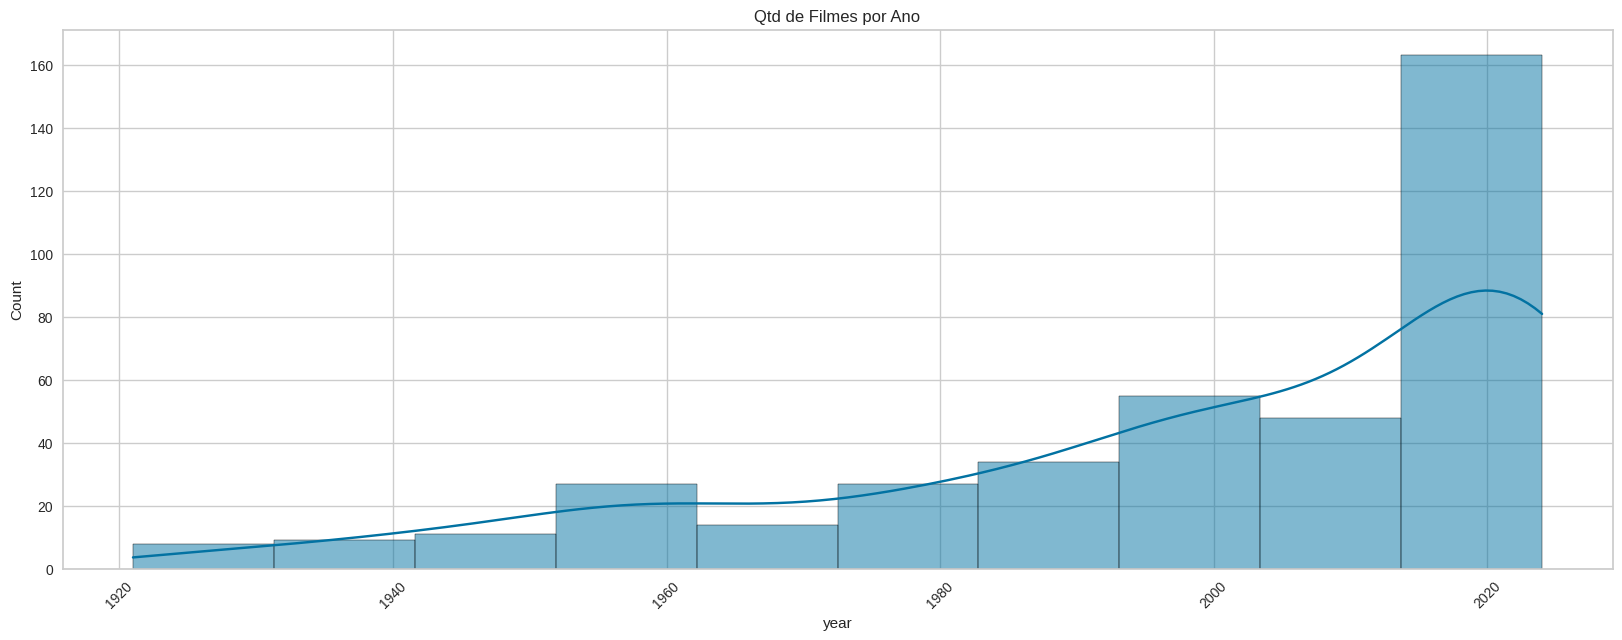

In [ ]:
plt.figure(figsize = (20,7))
sns.histplot(df,
              x = 'year',
              kde = True).set_title('Qtd de Filmes por Ano')
plt.xticks(rotation=45)
plt.show()

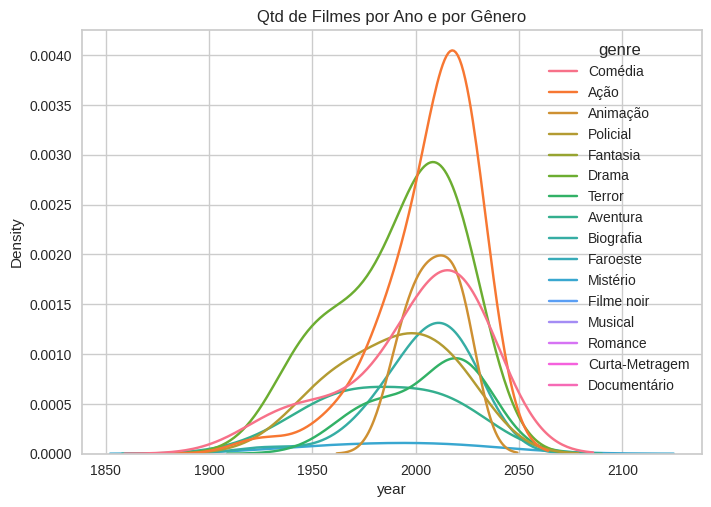

In [ ]:
sns.kdeplot( df, x = 'year', hue = 'genre', bw_adjust = 1.5, warn_singular = False).set_title('Qtd de Filmes por Ano e por Gênero')
plt.show()

# Pré-processamento de texto

In [ ]:
#convert sinopses to lowercase
df_processed = df.copy()
df_processed['sinopse'] = df_processed['sinopse'].str.lower()
df_processed['sinopse'].head()

0    stacey friedman se prepara para seu bat mitzva...
1    um thriller de ação de alta octanagem que desc...
2    os irmãos tartaruga trabalham para conquistar ...
3    o famoso arqueólogo e professor jones regressa...
4    acompanha a ascensão de um clube de motociclis...
Name: sinopse, dtype: object

In [ ]:
def qty_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [ ]:
### Feature Engineering
df_processed['word_count'] = df_processed['sinopse'].apply(qty_words).astype('int64')
df_processed.head()

,title_pt,year,genre,sinopse,word_count
0,Você Não Tá Convidada pro Meu Bat Mitzvá!,2023.0,Comédia,stacey friedman se prepara para seu bat mitzva...,19
1,Jawan,2023.0,Ação,um thriller de ação de alta octanagem que desc...,24
2,As Tartarugas Ninja: Caos Mutante,2023.0,Animação,os irmãos tartaruga trabalham para conquistar ...,19
3,Indiana Jones e a Relíquia do Destino,2023.0,Ação,o famoso arqueólogo e professor jones regressa...,38
4,The Bikeriders,2023.0,Policial,acompanha a ascensão de um clube de motociclis...,18


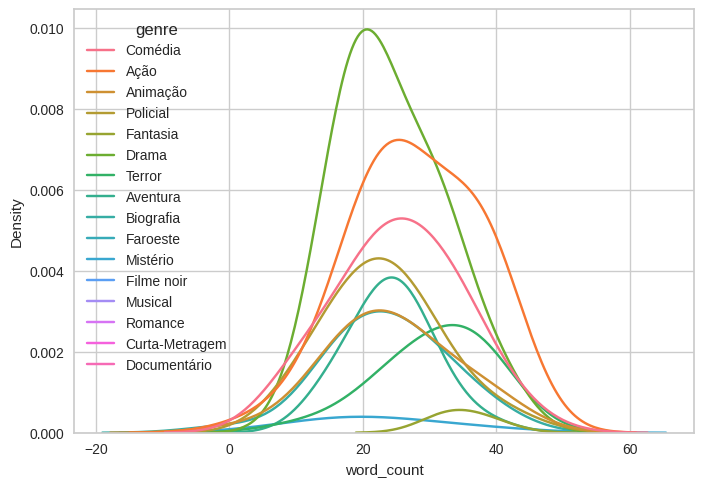

In [ ]:
sns.kdeplot( df_processed, x = 'word_count', hue = 'genre', bw_adjust = 1.5, warn_singular = False)
plt.show()

## Nuvem de palavras

### Antes de remover as stopwords

In [ ]:
text = ' '.join([phrase for phrase in df_processed['sinopse']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes', fontsize = 19)
plt.show()

### Após remoção das stopwords

In [ ]:
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_processed['sinopse_no_stopwords'] = df_processed['sinopse'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
text = ' '.join([phrase for phrase in df_processed['sinopse_no_stopwords']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes - excluindo stopwords', fontsize = 19)
plt.show()

## Aplicando TF-IDF
Term Frequency-Inverse Document Frequency

O TF-IDF define a importância de um termo levando em consideração a importância desse termo em um único documento e dimensionando-o por sua importância em todos os documentos.

In [ ]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_processed['sinopse_no_stopwords'])

In [ ]:
print(X.shape)
X.toarray()

(396, 179)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.48044058],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# KMeans - Clusterização

## Escolhendo o numero de "k" clusters ideal

### Método Elbow

2 368.12218157619657
3 362.3830280196065
4 359.30194138507045
5 352.3873742593353


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



6 349.80748128763076
7 341.9346790536857
8 336.6237502627766
9 339.4681931820089
10 332.2467469176548
11 331.3633487053754
12 327.34182713089467
13 322.4457135608943
14 324.82395393549893
15 318.5028324682712
16 313.9294269453258


Text(0, 0.5, 'WCSS')

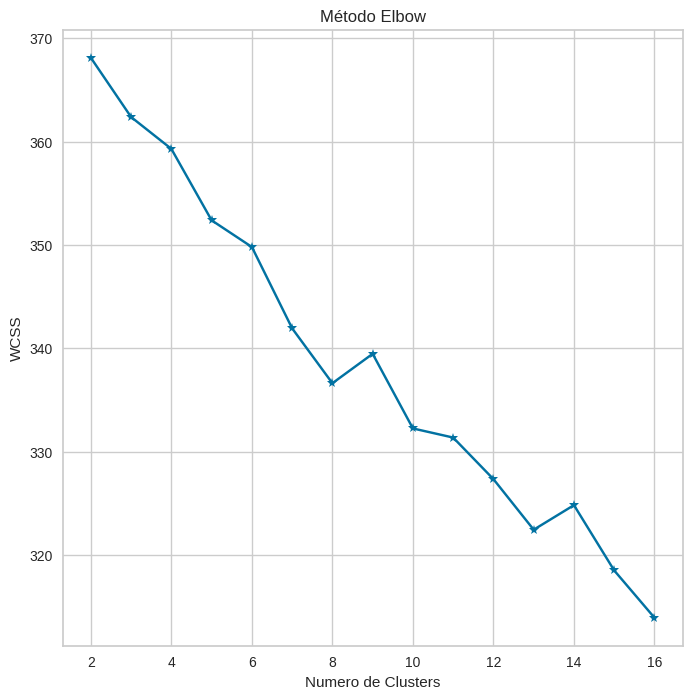

In [ ]:
plt.figure(figsize = (8,8))

#plotando o grafico do método elbow
wcss = []

for i in range(2, df_processed.genre.nunique()+1):
  kmeans = KMeans(n_clusters = i, init = 'random')
  kmeans.fit(X)
  print(i, kmeans.inertia_)
  wcss.append(kmeans.inertia_)

plt.plot(range(2, df_processed.genre.nunique()+1), wcss, '*-')
plt.title('Método Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of square


### Método Silhouette

IndexError: ignored

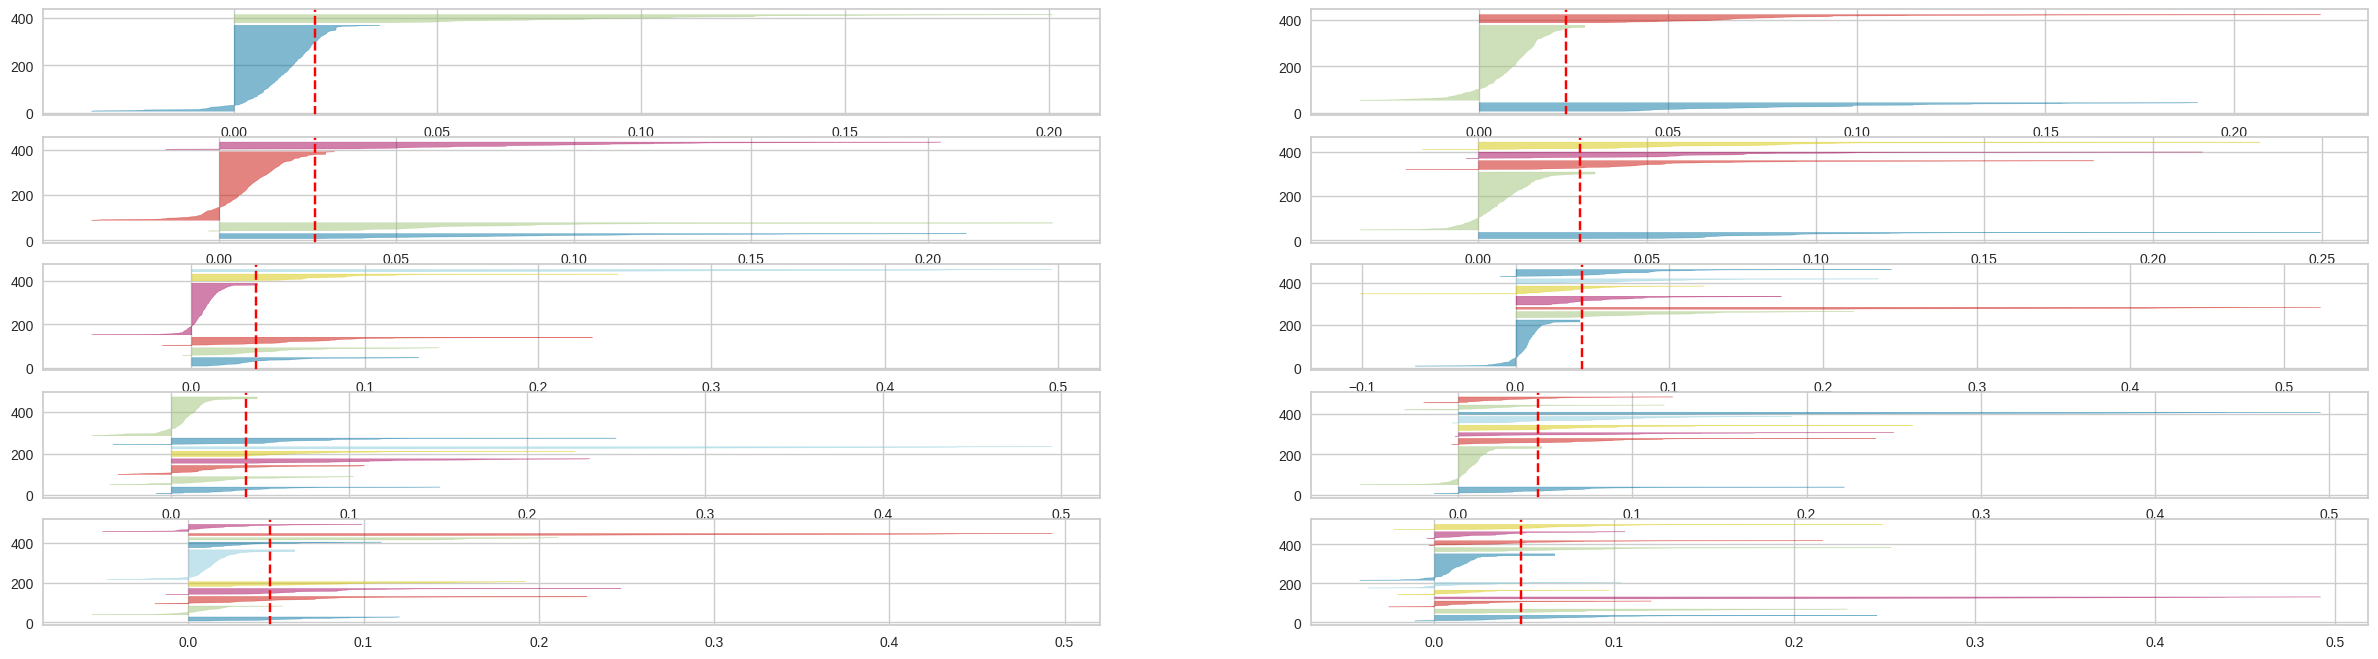

In [ ]:
fig, ax = plt.subplots(5,2, figsize = (30,8))
for i in (range(2, df_processed.genre.nunique()+1)):
  #Creating KMeans instance for different number of clusters
  kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 30, max_iter = 300, random_state = 45)
  q, mod = divmod(i,2)

  #Creating SilhouetteVisualizer instance with KMeans instance
  #Fit the visualizer

  visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(X)

### Análise do número de clusters | k = 5
* Tanto ambos métodos não mostraram claramente o numero ideal de clusters, provavelmente em função do numero reduzido de amostras existentes no dataset (250). Para fins didáticos será assumido o numero de k = 5.

# Comparativo entre os 5 clusters

In [ ]:
# initialize kmeans with 5 centroids
kmeans = KMeans(n_clusters=5, random_state=42)
# fit the model
kmeans = kmeans.fit(X)
#predicting the clusters and store cluster labels in a variable
labels = kmeans.predict(X)
#getting the cluster centers
c = kmeans.cluster_centers_

df_processed['cluster'] = labels
df_processed.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,title_pt,year,genre,sinopse,word_count,sinopse_no_stopwords,cluster
0,Você Não Tá Convidada pro Meu Bat Mitzvá!,2023.0,Comédia,stacey friedman se prepara para seu bat mitzva...,19,"stacey friedman prepara bat mitzvah, planos de...",0
1,Jawan,2023.0,Ação,um thriller de ação de alta octanagem que desc...,24,thriller ação alta octanagem descreve jornada ...,0
2,As Tartarugas Ninja: Caos Mutante,2023.0,Animação,os irmãos tartaruga trabalham para conquistar ...,19,irmãos tartaruga trabalham conquistar amor cid...,0
3,Indiana Jones e a Relíquia do Destino,2023.0,Ação,o famoso arqueólogo e professor jones regressa...,38,famoso arqueólogo professor jones regressa nov...,3
4,The Bikeriders,2023.0,Policial,acompanha a ascensão de um clube de motociclis...,18,acompanha ascensão clube motociclistas meio-oe...,0


## Filmes por cluster

In [ ]:
fig = px.bar(df_processed.cluster.value_counts(),
             text_auto = True,
             title = 'Qtd de Filmes por Cluster',
             labels = {'index': 'Cluster #',
                       'value':'Qtd. de Filmes'})
fig.show()

## % de Gêneros por Cluster

In [ ]:
def gene_cluster(df):
  df_plot = df_processed.groupby(['cluster', 'genre'])['title_pt'].count()
  df_plot = df_plot.reset_index()
  df_plot.rename(columns = {'title_pt':'count'}, inplace = True)
  df_plot['%'] = 100 * df_plot['count'] / df_plot.groupby('cluster')['count'].transform('sum')
  df_plot = df_plot.sort_values(['cluster', '%'], ascending = False).groupby('cluster').head(11)

  fig = sns.catplot(
      data=df_plot, x="genre", y = "%", col="cluster",
      kind="bar", height=4, aspect=1, sharex = False);
  fig.set_xlabels('');
  fig.set_xticklabels(rotation=90, size = 8);
  return gene_cluster

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3201: UserWarning:

Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.



<function __main__.gene_cluster(df)>

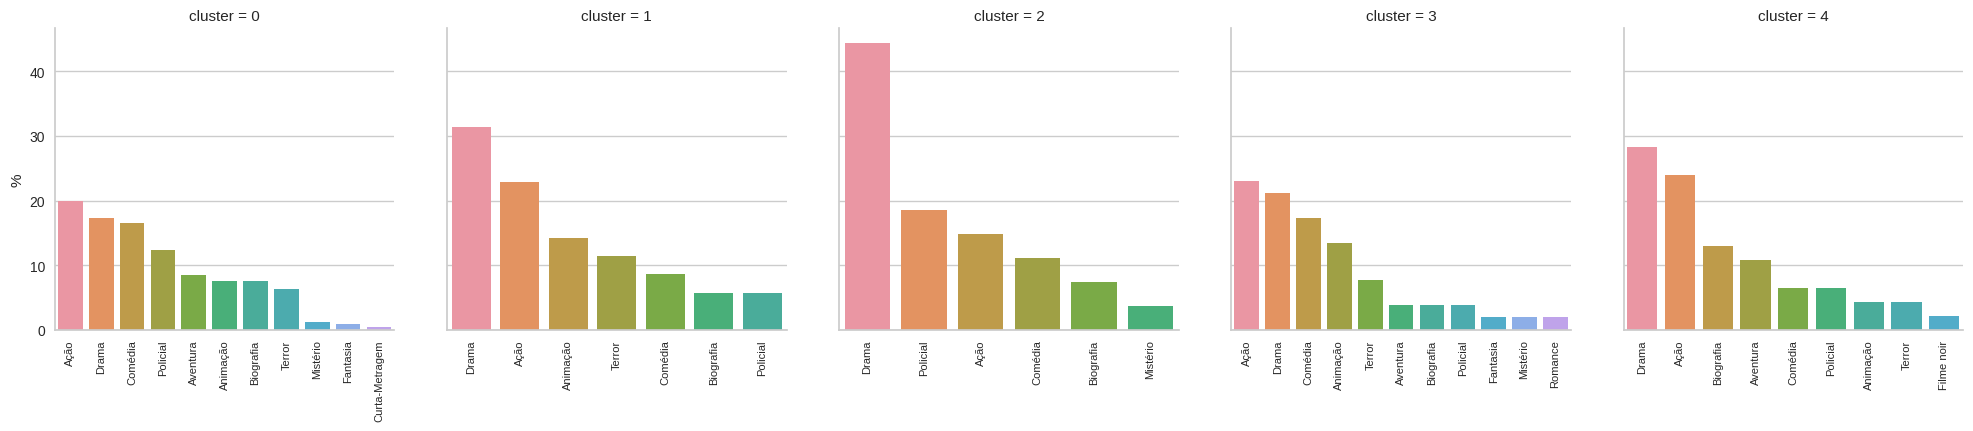

In [ ]:
gene_cluster(df)

## Ano de Lançamento por Cluster

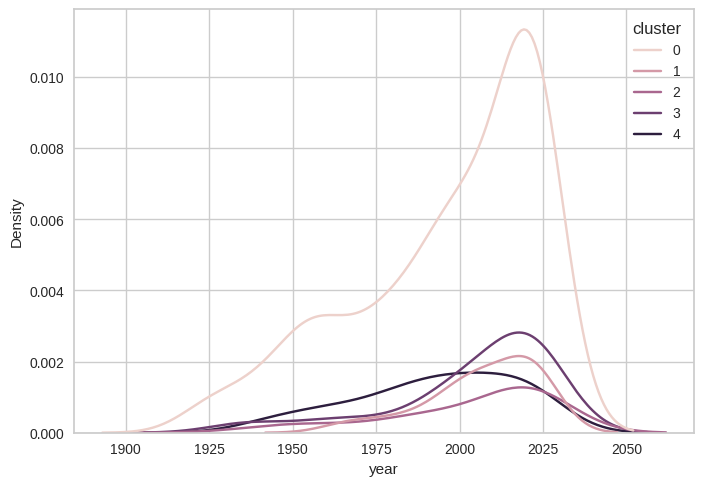

In [ ]:
sns.kdeplot(df_processed, x = 'year', hue = 'cluster');

## Radar | Gêneros por Cluster

In [ ]:
df_pivot = df_plot.copy()
df_pivot = df_pivot.pivot(index = 'cluster', columns = 'genre', values = '%')
df_pivot.fillna(0, inplace = True)
df_pivot = df_pivot.T.reset_index()
df_pivot.index.name = None
df_pivot

In [ ]:
df_polar = df.melt(id_vars=['genre'])
df_polar.head()

,genre,variable,value
0,Comédia,title_pt,Você Não Tá Convidada pro Meu Bat Mitzvá!
1,Ação,title_pt,Jawan
2,Animação,title_pt,As Tartarugas Ninja: Caos Mutante
3,Ação,title_pt,Indiana Jones e a Relíquia do Destino
4,Policial,title_pt,The Bikeriders


In [ ]:
fig = px.line_polar(df_polar, r='value', theta='genre', color = 'cluster', line_close=True)
fig.show();

# Nuvem de Palavras por Cluster

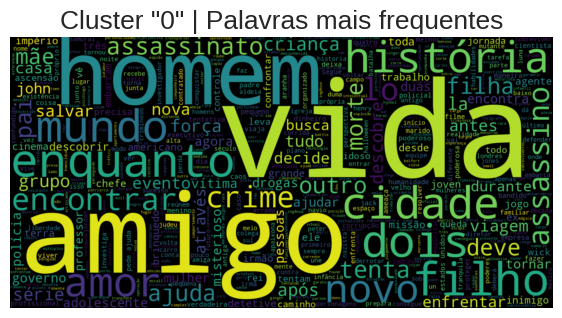

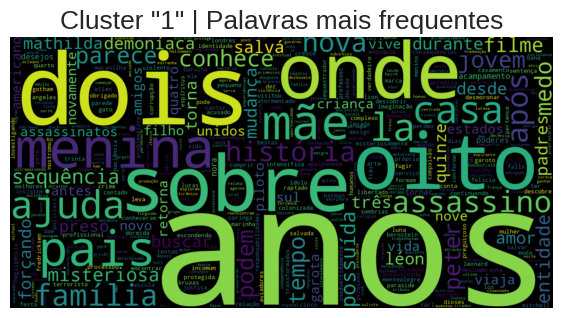

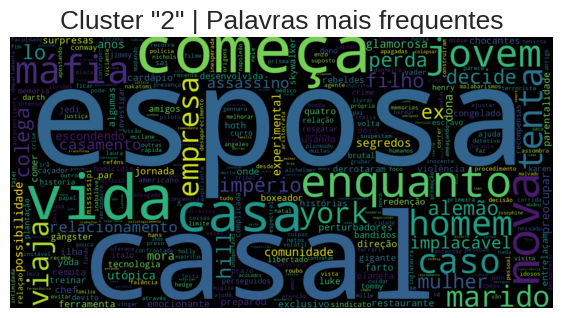

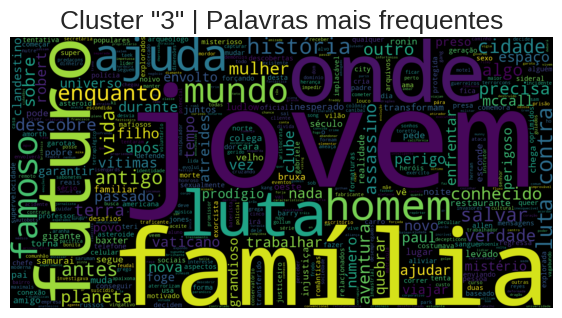

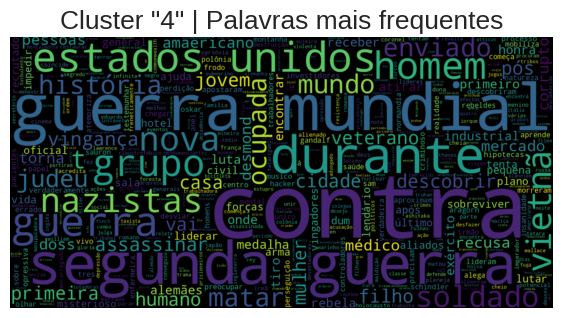

In [ ]:
def word_cloud_cluster(cluster:int):
  text = ' '.join([phrase for phrase in df_processed.loc[df_processed.cluster == cluster]['sinopse_no_stopwords']])
  plt.figure(figsize=(7,5), facecolor='None')
  wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Cluster "{cluster}" | Palavras mais frequentes', fontsize = 19)
  plt.show()
  return

for c in range(5):
  word_cloud_cluster(c)

# Considerações Finais
* **Exercício: Reescrever as análises / conclusões devido a atualização da base**

Nessa segunda parte foi usado o top 100 melhores filmes.
A inciiativa foi paar entender como o modelo se comportaria com a clusterização no caso de não ter
aleatoriedade ja que já sabiamos o top 1 do site.

E como o filme mais votado é Oppenheimer o cluster 0 ficou com a melhor distruibuição e na nuvem de
palavras é o que melhor sugere ao filme, já que as palavras chaves são: estados unidos, historia, americano, assassinados...
Foi um cluster com bastante palavras e quase todas no mesmo tamanho.

No gráfico polar, evidenciamos que o cluster 0 variou um pouco em cómedia, o que explicaria o 2° lugar da lista: Barbie, que oscila
entre drama e comédia.
O cluster 4 se mostrou com amostrar significativas no gênero "Biografia" e "policial".

Por fim, as distribuições dos cluster ficaram bem parecidas entre si. Etretanto, os cluster 2,3 e 4 possuem mais gêneros que os cluster 0 e 1.
E como analisado acima, o gênero com maior destaque é drama, e o segundo, comédia.

Obrigada prof!

# Sprint 3


In [ ]:
!pip install pycaret
!pip install streamlit

In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
%%writefile app.py

import streamlit as st
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def main():
  st.set_page_config(page_title = 'S3 - Automated Machine Learning and Deploy',

                      layout = 'wide',
                      initial_sidebar_state = 'expanded')

  st.title('Exibição de filmes por cluster :D')

  with st.sidebar:
      c1, c2 = st.columns(2)

      c2.write('')
      c2.subheader('Automated Machine Learning and Deploy')

      # database = st.selectbox('Fonte dos dados de entrada (X):', ('CSV', 'Online'))
      database = st.radio('Fonte dos dados de entrada (X):', ('CSV', 'Online'))

      if database == 'CSV':
          st.info('Upload do CSV')
          file = st.file_uploader('Selecione o arquivo CSV', type='csv')

      else:
          pass


  #Tela principal
  #with




if __name__=='__main__':
  main()

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

In [ ]:
34.74.168.68